# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Load the Data

In [5]:
df = pd.read_csv("tae.csv",names=['speaker', 'instructor', 'course', 'semester', 'class_size', 'attribute'])

In [6]:
df.head()

,speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [7]:
df.tail()

,speaker,instructor,course,semester,class_size,attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


Check data shape, missing values, types:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   speaker     151 non-null    int64
 1   instructor  151 non-null    int64
 2   course      151 non-null    int64
 3   semester    151 non-null    int64
 4   class_size  151 non-null    int64
 5   attribute   151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [9]:
df.describe()

,speaker,instructor,course,semester,class_size,attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [10]:
df.isna().sum()

speaker       0
instructor    0
course        0
semester      0
class_size    0
attribute     0
dtype: int64

# Exploratory Data Analysis (EDA)

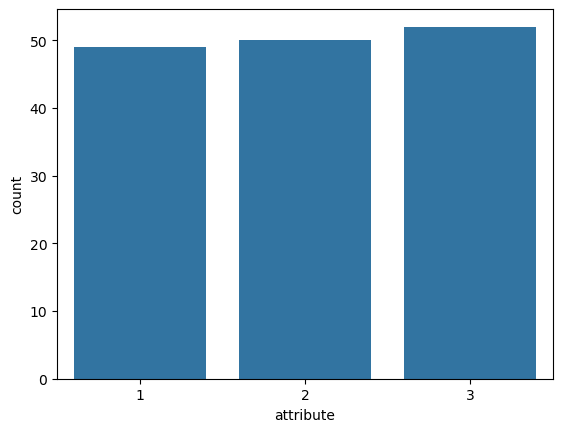

In [11]:
df_performance = df.groupby('attribute')[['speaker']].count().reset_index().rename(columns={'speaker': 'count'})
sns.barplot(x='attribute', y='count', data=df_performance, color='tab:blue')
plt.show()

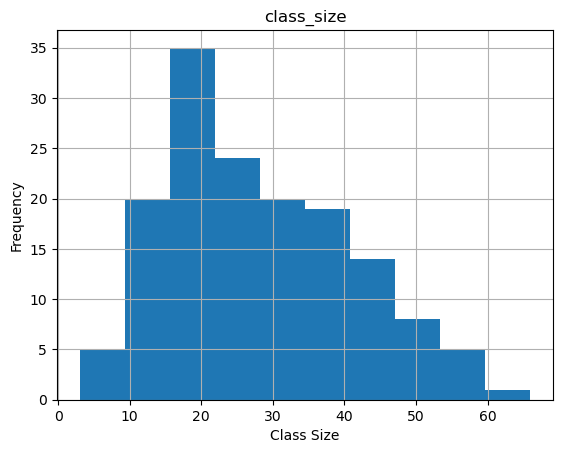

In [12]:
numerical_columns = ['class_size']
for column in numerical_columns:
    df[column].hist()
    plt.title(column)
    plt.xlabel('Class Size')
    plt.ylabel('Frequency')
    plt.show()

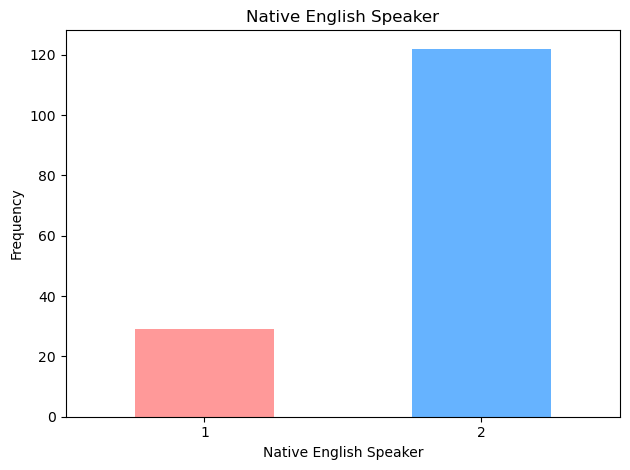

In [13]:
colors = ['#FF9999', '#66B3FF']
instructor_counts = df['speaker'].value_counts().sort_index()
instructor_counts.plot(kind='bar', color = colors)
plt.title('Native English Speaker')
plt.xlabel('Native English Speaker')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

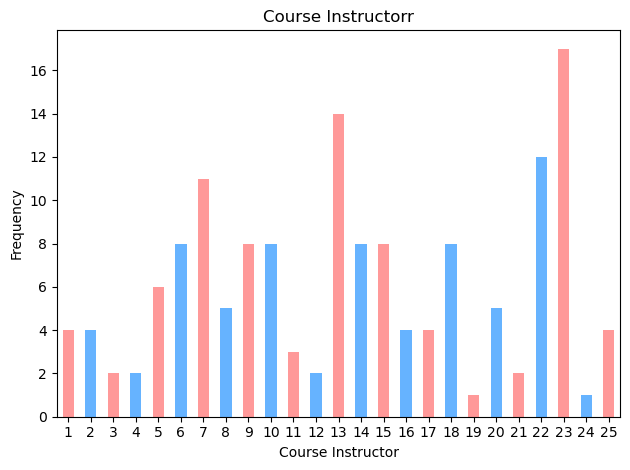

In [14]:
colors = ['#FF9999', '#66B3FF']

instructor_counts = df['instructor'].value_counts().sort_index()



instructor_counts.plot(kind='bar', color = colors)
plt.title('Course Instructorr')
plt.xlabel('Course Instructor')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

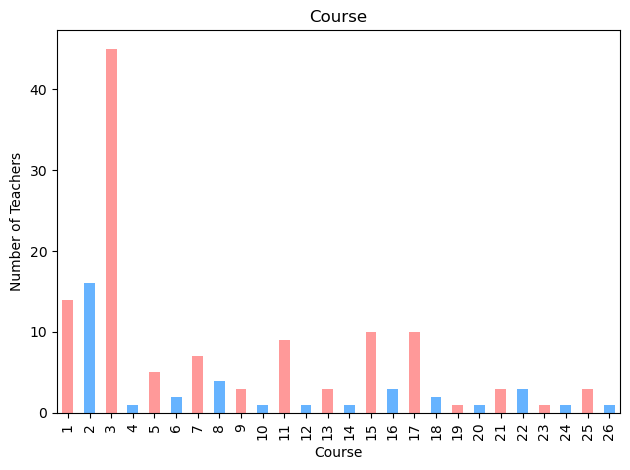

In [15]:
colors = ['#FF9999', '#66B3FF']

course_counts = df['course'].value_counts().sort_index()



course_counts.plot(kind='bar', color = colors)
plt.title('Course')
plt.xlabel('Course')
plt.ylabel('Number of Teachers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

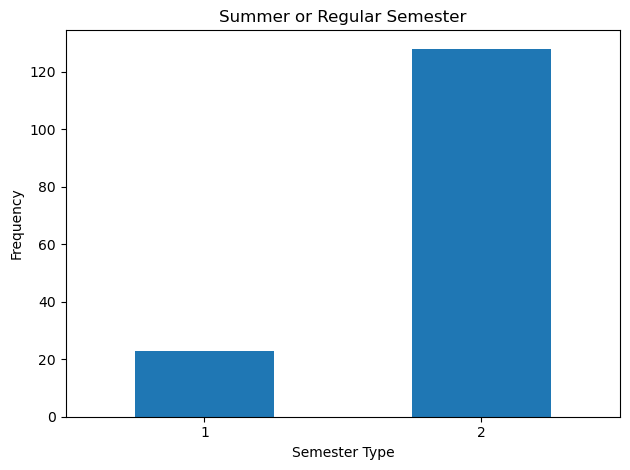

In [16]:

semester_counts = df['semester'].value_counts().sort_index()
semester_counts.plot(kind='bar')
plt.title('Summer or Regular Semester')
plt.xlabel('Semester Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

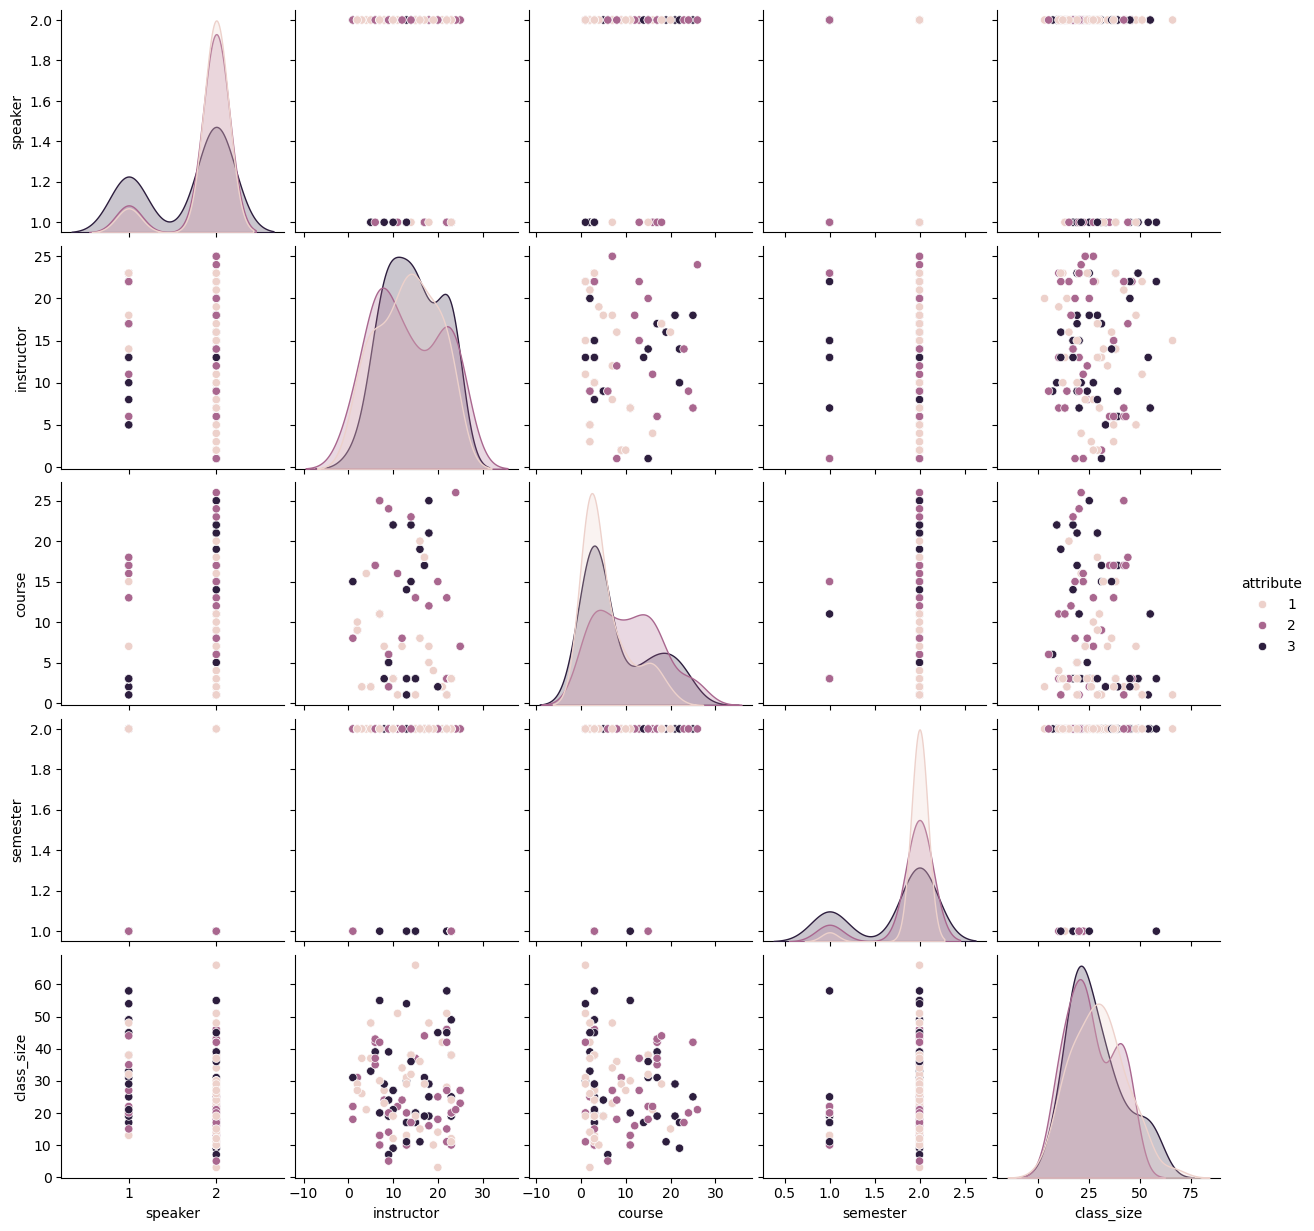

In [17]:
sns.pairplot(df,hue='attribute')

# Data Modelling

In [18]:
x=df.drop('attribute',axis=1)
x.sample(5)

,speaker,instructor,course,semester,class_size
87,1,23,3,1,20
96,1,11,16,2,22
85,2,7,11,1,20
135,2,12,8,2,24
121,2,13,14,2,17


In [19]:
y=df['attribute']
y.sample(5)

94     3
65     2
46     3
9      3
126    3
Name: attribute, dtype: int64

Split dataset to training and testing

50% for training and 50% for testing

In [20]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.5)

Support Vector Machine(SVM)

In [21]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [22]:
pred=model.predict(x_test)
pred

array([2, 3, 1, 1, 3, 3, 2, 1, 3, 3, 3, 2, 2, 2, 1, 1, 3, 1, 2, 2, 2, 1,
       3, 2, 2, 1, 2, 1, 3, 3, 1, 2, 3, 1, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3,
       3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       3, 1, 1, 3, 1, 2, 2, 3, 3, 1], dtype=int64)

In [23]:
y_test

82    3
30    1
61    2
73    1
62    2
     ..
16    2
87    3
8     3
47    3
91    3
Name: attribute, Length: 76, dtype: int64

Classification accuracy

In [24]:
accuracy_score(y_test,pred)

0.34210526315789475

In [25]:
confusion_matrix(y_test,pred)

array([[11,  6,  7],
       [ 6,  6, 14],
       [ 7, 10,  9]], dtype=int64)

Text(50.722222222222214, 0.5, 'True labels')

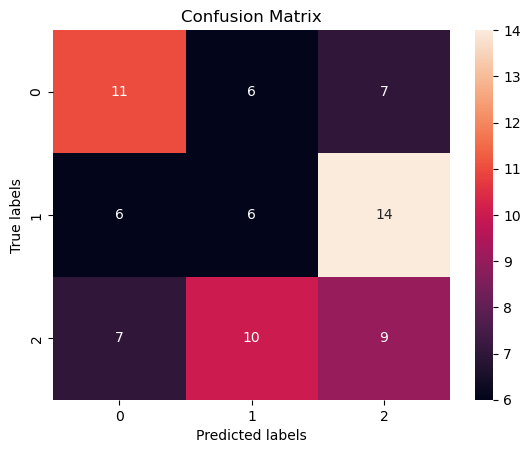

In [26]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [35]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

,1,2,3,accuracy,macro avg,weighted avg
precision,0.478261,0.394737,0.533333,0.447368,0.468777,0.468527
recall,0.458333,0.576923,0.307692,0.447368,0.447650,0.447368
f1-score,0.468085,0.468750,0.390244,0.447368,0.442360,0.441683
support,24.000000,26.000000,26.000000,0.447368,76.000000,76.000000


Decision tree

In [28]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
pred=model.predict(x_test)
pred

array([2, 1, 2, 1, 1, 3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 1, 3, 2, 1, 1,
       2, 3, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2], dtype=int64)

In [30]:
y_test

82    3
30    1
61    2
73    1
62    2
     ..
16    2
87    3
8     3
47    3
91    3
Name: attribute, Length: 76, dtype: int64

Classification accuracy

In [31]:
accuracy_score(y_test,pred)

0.4473684210526316

In [32]:
confusion_matrix(y_test,pred)

array([[11, 11,  2],
       [ 6, 15,  5],
       [ 6, 12,  8]], dtype=int64)

Text(50.722222222222214, 0.5, 'True labels')

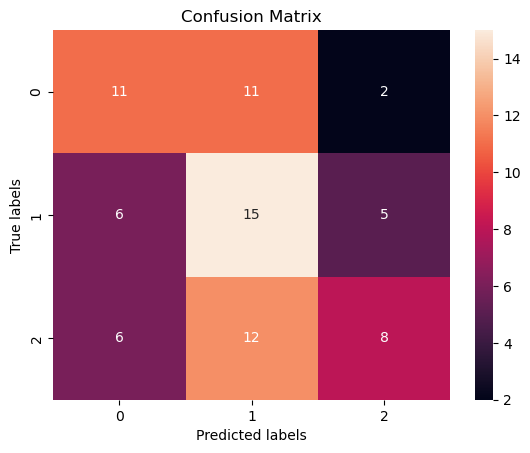

In [33]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [34]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

,1,2,3,accuracy,macro avg,weighted avg
precision,0.478261,0.394737,0.533333,0.447368,0.468777,0.468527
recall,0.458333,0.576923,0.307692,0.447368,0.447650,0.447368
f1-score,0.468085,0.468750,0.390244,0.447368,0.442360,0.441683
support,24.000000,26.000000,26.000000,0.447368,76.000000,76.000000


# Challenges and Solutions

Challenge:
High cardinality in categorical columns (Instructor, Course),
Small dataset (151 rows),
Class imbalance,
Model overfitting,


Solution:
Applied One-Hot Encoding with care to avoid a dimensionality explosion,
Used cross-validation instead of a single train-test split to ensure robust results,
Checked class distribution; classes are roughly balanced, so no resampling was required,
Controlled via hyperparameter tuning and cross-validation,
